In [1]:
import uproot as up 
import numpy as np
import pandas as pd
from matplotlib.colors import LogNorm
from matplotlib.pylab import figure, cm

print(' uproot version: ', up.__version__)


 uproot version:  5.3.10


In [2]:
file = up.open("qt_ntuple.root")


In [3]:
file.classnames()


{'Jet_Tree;1': 'TTree'}

In [4]:
events = file["Jet_Tree"]
print('Number of Branches inside Jet_Tree = ', len(events.keys()))
events.keys()


Number of Branches inside Jet_Tree =  6


['jet_pt',
 'jet_eta',
 'jet_phi',
 'jet_mass',
 'jet_nConstituents',
 'jet_PartonTruthLabelID']

In [5]:
events['jet_PartonTruthLabelID'].show()


name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
jet_PartonTruthLabel | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), heade


In [6]:
df = events.arrays(library="pd") #pip install awkward-pandas
df.head()


,jet_pt,jet_eta,jet_phi,jet_mass,jet_nConstituents,jet_PartonTruthLabelID
0,"[70531.953125, 48116.99609375, 33069.40234375,...","[-4.147092819213867, -2.635150194168091, -2.79...","[-2.8937723636627197, 0.35589802265167236, -2....","[12364.1494140625, 4221.23291015625, 3450.9887...","[2, 6, 3, 3]","[1, 5, 5, 2]"
1,"[55547.35546875, 53744.61328125, 38019.53125, ...","[-1.2774360179901123, 1.1695435047149658, 0.52...","[-1.6143466234207153, 0.1716727316379547, 1.96...","[5615.666015625, 4516.9921875, 1792.0845947265...","[10, 6, 2, 2, 4, 5, 10]","[5, -1, -1, 1, -1, 5, 5]"
2,"[60969.22265625, 57916.43359375, 51263.0273437...","[2.157918691635132, -0.06299235671758652, 0.45...","[-2.504263401031494, 1.4760823249816895, -0.96...","[7068.25439453125, 3767.4853515625, 6285.42919...","[16, 5, 6, 2, 5, 1, 2, 2, 3]","[2, 5, 5, -1, -1, 21, -1, 5, 21]"
3,"[187796.203125, 120024.3046875, 60549.828125, ...","[-1.5868785381317139, 0.33101511001586914, 0.3...","[-1.7872248888015747, 0.12948715686798096, 1.4...","[22561.6953125, 1902.77294921875, 437.24783325...","[7, 2, 2, 6, 2, 3]","[5, -1, 21, 3, -1, 5]"
4,"[75304.359375, 42984.23046875, 25983.75390625,...","[1.8636093139648438, -2.1332457065582275, 0.34...","[-0.9558277726173401, -2.4846622943878174, 1.6...","[6256.10107421875, 7295.39208984375, 757.58056...","[7, 14, 2, 2, 7, 4, 1, 6]","[5, 1, 21, 1, 5, 5, -1, 2]"


In [9]:
type(df.iloc[0]["jet_pt"])


awkward.highlevel.Array

In [7]:
def flatten_awkward_array(row):
    return pd.Series({col: list(row[col]) for col in row.index})


In [8]:
df_flat = df.apply(flatten_awkward_array, axis=1).explode(list(df.columns)).reset_index(drop=True)


In [10]:
bjets       = df_flat [ df_flat["jet_PartonTruthLabelID"] == 5 ]
failed_jets = df_flat [ df_flat["jet_PartonTruthLabelID"] == -1]
light_jets = df_flat[ (df_flat["jet_PartonTruthLabelID"] != 5) & (df_flat["jet_PartonTruthLabelID"] != -1)]



In [12]:
print("# of bjets:       ", len(bjets))
print("# of light jets:  ", len(light_jets))
print("# of failed jets: ", len(failed_jets))


# of bjets:        2509
# of light jets:   2413
# of failed jets:  1701


In [14]:
print("% of bjets:       ", len(bjets)/len(df_flat)*100 )
print("% of light jets:  ", len(light_jets)/len(df_flat)*100 )
print("% of failed jets: ", len(failed_jets)/len(df_flat)*100 )


% of bjets:        37.88313453117922
% of light jets:   36.43364034425487
% of failed jets:  25.683225124565904


Text(0.5, 0, 'phi')

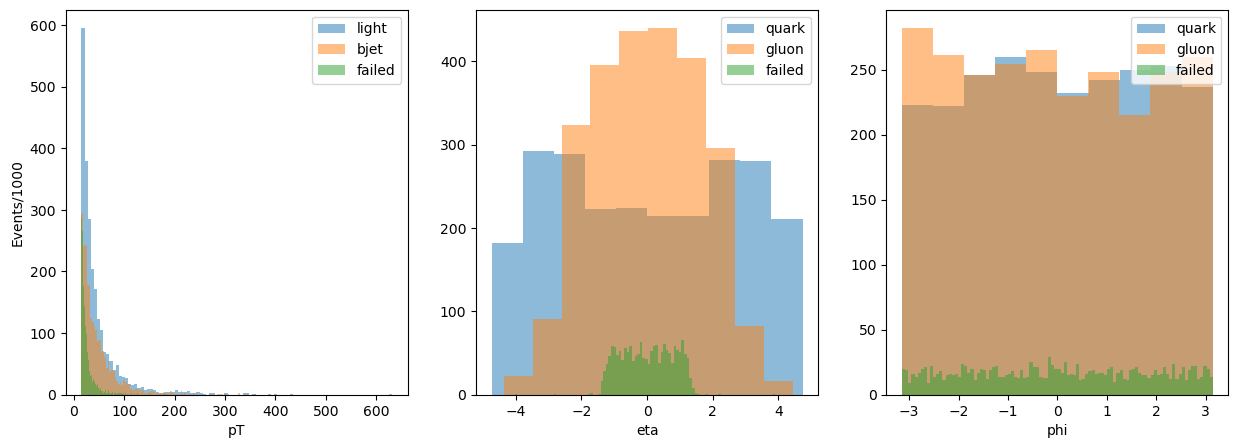

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

plt.subplot(131)
plt.hist(light_jets['jet_pt']/1e3,bins=100,alpha=0.5,label='light')
plt.hist(bjets['jet_pt']/1e3,bins=100,alpha=0.5,label='bjet')

plt.hist(failed_jets['jet_pt']/1e3,bins=100,alpha=0.5,label='failed')
plt.legend()
plt.xlabel('pT')
plt.ylabel('Events/1000')

plt.subplot(132)
plt.hist(light_jets['jet_eta'],alpha=0.5,label='quark')
plt.hist(bjets['jet_eta'],alpha=0.5,label='gluon')

plt.hist(failed_jets['jet_eta'],bins=100,alpha=0.5,label='failed')
plt.legend()
plt.xlabel('eta')

plt.subplot(133)
plt.hist(light_jets['jet_phi'],alpha=0.5,label='quark')
plt.hist(bjets['jet_phi'],alpha=0.5,label='gluon')
plt.hist(failed_jets['jet_phi'],bins=100,alpha=0.5,label='failed')


#plt.xlim(-2, 22)
plt.legend()
plt.xlabel('phi')


Text(0.5, 0, 'phi')

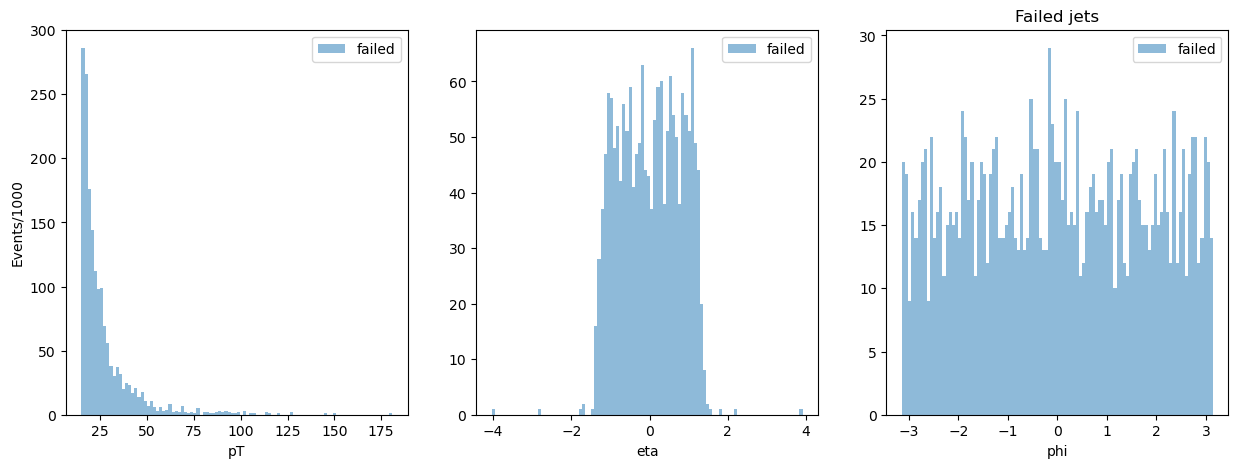

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

plt.subplot(131)
plt.hist(failed_jets['jet_pt']/1e3,bins=100,alpha=0.5,label='failed')
plt.legend()
plt.xlabel('pT')
plt.ylabel('Events/1000')

plt.subplot(132)
plt.hist(failed_jets['jet_eta'],bins=100,alpha=0.5,label='failed')
plt.legend()
plt.xlabel('eta')

plt.subplot(133)
plt.hist(failed_jets['jet_phi'],bins=100,alpha=0.5,label='failed')

plt.title("Failed jets")
plt.legend()
plt.xlabel('phi')


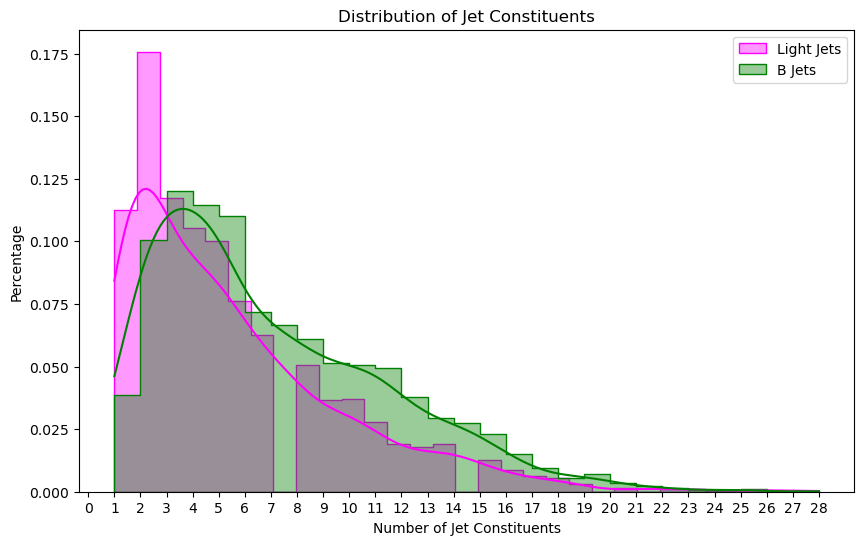

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
max_val = max(light_jets['jet_nConstituents'].max(), bjets['jet_nConstituents'].max())
bins = np.arange(0, max_val + 1.5) - 0.5

# Plotting the histograms
plt.figure(figsize=(10, 6))

sns.histplot(light_jets['jet_nConstituents'], color='magenta', label='Light Jets', kde=True, stat="probability", common_norm=False, alpha=0.4, element= "step")
sns.histplot(bjets['jet_nConstituents'], color='green', label='B Jets', kde=True, stat="probability", common_norm=False, alpha=0.4, element= "step")

plt.xticks(np.arange(0, max_val + 1, 1) )
plt.title('Distribution of Jet Constituents')
plt.xlabel('Number of Jet Constituents')
plt.ylabel('Percentage')
plt.legend()
plt.show()


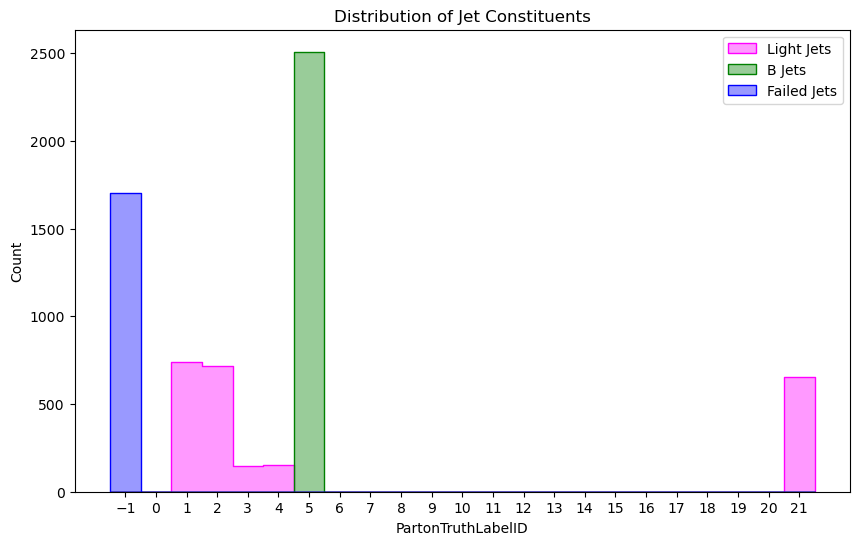

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Determine the maximum value of PartonTruthLabelID in the datasets
max_val = max(light_jets['jet_PartonTruthLabelID'].max(), bjets['jet_PartonTruthLabelID'].max(), failed_jets['jet_PartonTruthLabelID'].max())
bins = np.arange(-1, max_val + 1.5) - 0.5
# Plotting the histograms
plt.figure(figsize=(10, 6))

sns.histplot(light_jets['jet_PartonTruthLabelID'], color='magenta', label='Light Jets', stat="count", alpha=0.4, element= "step", bins = bins)
sns.histplot(bjets['jet_PartonTruthLabelID'], color='green', label='B Jets', stat="count", alpha=0.4, element= "step", bins = bins)
sns.histplot(failed_jets['jet_PartonTruthLabelID'], color='blue', label='Failed Jets', stat="count", alpha=0.4, element= "step", bins = bins)

plt.xticks(np.arange(-1, max_val + 1, 1))
plt.title('Distribution of Jet Constituents')
plt.xlabel('PartonTruthLabelID')
plt.ylabel('Count')
plt.legend()
plt.show()


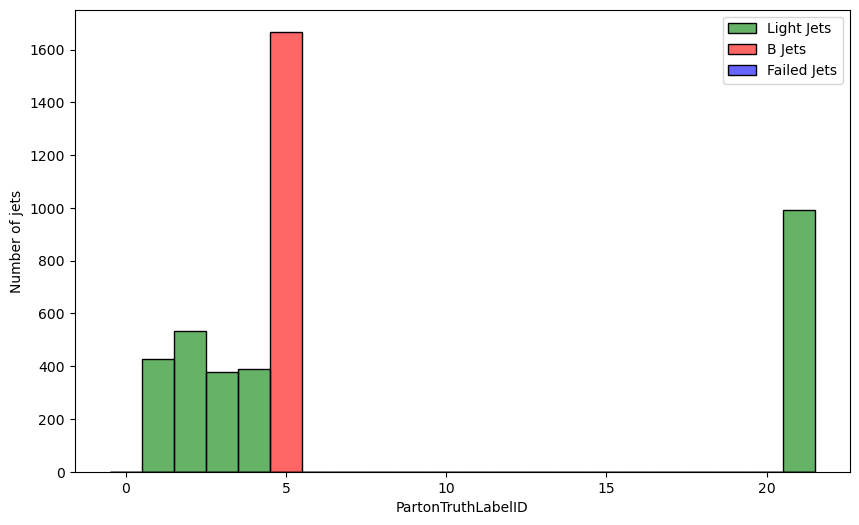

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Determine the maximum value of PartonTruthLabelID in the datasets
max_val = max(light_jets['jet_PartonTruthLabelID'].max(), bjets['jet_PartonTruthLabelID'].max(), failed_jets['jet_PartonTruthLabelID'].max())

# Define bins with 1 unit width
bins = np.arange(0, max_val + 1.5) - 0.5

# Plotting the histograms
plt.figure(figsize=(10, 6))

# Plotting the histograms for each type of jet with defined bins
sns.histplot(light_jets['jet_PartonTruthLabelID'], color='green', label='Light Jets', kde=False, stat="count", alpha=0.6, bins=bins)
sns.histplot(bjets['jet_PartonTruthLabelID'], color='red', label='B Jets', kde=False, stat="count", alpha=0.6, bins=bins)
sns.histplot(failed_jets['jet_PartonTruthLabelID'], color='blue', label='Failed Jets', kde=False, stat="count", alpha=0.6, bins=bins)

plt.xlabel('PartonTruthLabelID')
plt.ylabel('Number of jets')
plt.legend()
plt.show()
